# Examen Data Science & AI

| | |
| :--- | :--- |
| **Examenreeks** | Voorbeeldexamen |
| **Student:** | VUL HIER JE NAAM IN |
| **Studentennummer:** | VUL HIER JE STUDENTENNUMMER IN |
| **Datum & uur:** | EXAMENDATUM, STARTUUR |
| **Klasgroep:** | VUL HIER JE KLASGROEP IN |
| **IOEM-student:** | NEE |

Add code cells where necessary to work out the questions.  
**Please note that the contents of the code blocks are not considered as answers! Only what you write in the Markdown cells provided, counts as an answer! The contents of the code blocks only serve to substantiate your answer, so that we can see what you did to get your answer should it not match the expected outcome.

!! The exam will be in dutch for all students not enrolled in the IC !!

In [51]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


## Question 1

Suppose we have a dataset containing log data from a web server. Each row contains information from an HTTP request sent to the server, including the following information:

1. Timestamp of the HTTP request (in Unix time, number of seconds since 1970-01-01)
2. The type of HTTP request (GET, PUT, HEAD, DELETE, ...)
3. Response time (in ms)
4. The status of the response (2xx, 4xx, 5xx, ...)

What is the measurement level of each of these variables?

## Answers Question 1


1.  Ratio
2.  Nominal
3.  Ratio
4.  Nominal

## Question 2

For a survey in a school with 100 boys and 100 girls, the following method is used to form a sample:

- All boys and girls are sorted into two rows according to their height
- A coin is tossed
    - With cross, the first boy from the boys' row is chosen
    - At coin, the first girl is chosen from the girls' row.
- This is repeated until 10 pupils are selected.

<hr/>

1. Is this a random sample? Explain.
2. What type of error is being made here?
3. Is this a good sample? Explain.

## Answers Question 2

1.
2.
3.

## Question 3

In a basket are seven fruits, 4 oranges and 3 lemons. You take ...

(1) just one fruit. What is the probability that this is an orange?  
(2) one fruit and then another without putting the first one back. What is the probability that the two fruits taken are both oranges?  
(3) two fruits, one after one and without putting it back. What is the probability that the second fruit is an orange?  
(4) a first fruit, without looking! Then take another one from the basket without putting the first one back. This second fruit is an orange. Now what is the probability that the first fruit is an orange?

## Answers Question 3

1. 4/7
2. 2/7
3. 4/7 * 3/6 + 3/7 * 4/6
4. 1/2

## Question 4

The diameter of pistons produced in a factory are _D_ cm where _D_ ~ Nor(13.4, 0.12)

(1) The tolerance specified for the pistons is that the diameter needs to be at least 13.35 cm and not more than 13.5 cm. What proportion of the production in the factory meets these tolerance limits?  
(2) Three pistons are chosen at random. What is the probability that none of them meet the tolerance limits  
(3) A sample of 20 pistons is taken at random. The mean value for the diameter is found to be 13.43 cm. Test at the 5% significance level whether any modifications have been made to the machine producing the pistons.


## Answers Question 4

...

## Question 5

The number of employees on the payroll at a food processing company is recorded at the beginning of each month.
These data are given below.

1. Give the data types of both columns
2. Convert the 'date' column to datetime type. Even if this fails you can continue working.
3. Create the following plot.

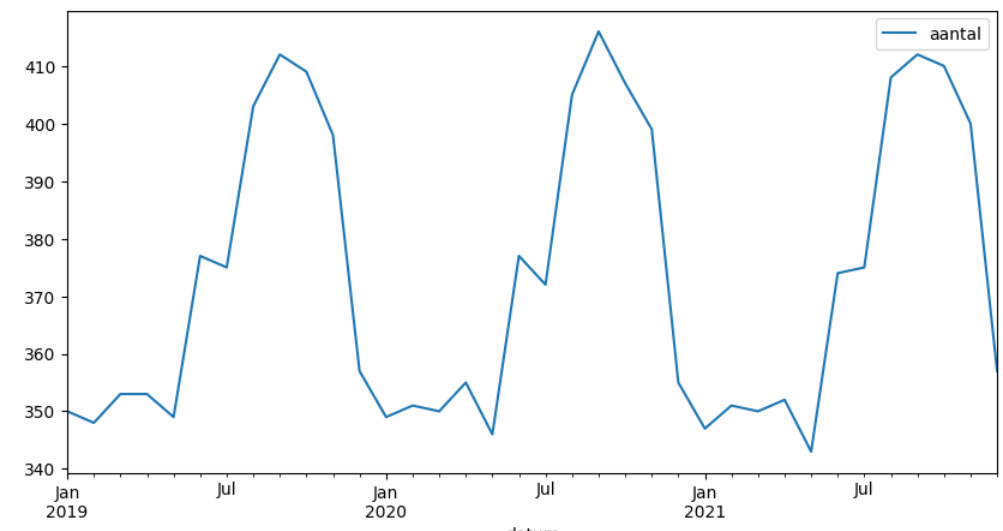

4. Make a forecast for the first four months of the next year using the most appropriate method. Explain why you chose this method.
5. Make a plot including the forecast.
6. Make the following calculations
- 6.1 Calculate the average number of employees in 2020
- 6.2 How many months did the company have more than 400 employees?




In [52]:
dfemployees = pd.DataFrame(data={
    'recording_date': ['2019/01/01', '2019/02/01', '2019/03/01', '2019/04/01', '2019/05/01', '2019/06/01', '2019/07/01', '2019/08/01', '2019/09/01', '2019/10/01', '2019/11/01', '2019/12/01', '2020/01/01', '2020/02/01', '2020/03/01', '2020/04/01', '2020/05/01', '2020/06/01', '2020/07/01', '2020/08/01', '2020/09/01', '2020/10/01', '2020/11/01', '2020/12/01', '2021/01/01', '2021/02/01', '2021/03/01', '2021/04/01', '2021/05/01', '2021/06/01', '2021/07/01', '2021/08/01', '2021/09/01', '2021/10/01', '2021/11/01', '2021/12/01'],
    'number': [350,348,353,353,349,377,375,403,412,409,398,357,349,351,350,355,346,377,372,405,416,407,399,355,347,351,350,352,343,374,375,408,412,410,400,357]
})
dfemployees['recording_date'] = pd.to_datetime(dfemployees['recording_date'])
dfemployees.dtypes

recording_date    datetime64[ns]
number                     int64
dtype: object

<Axes: xlabel='recording_date'>

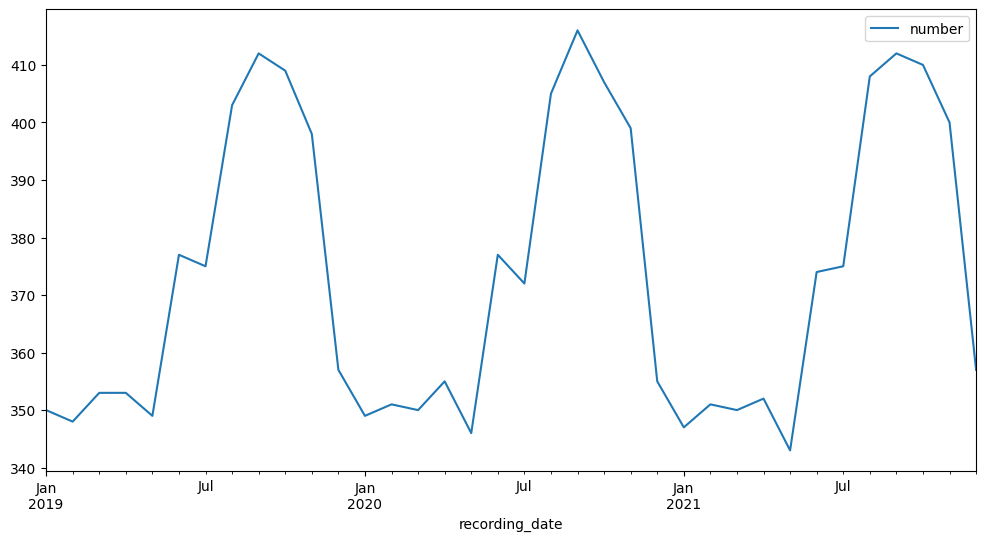

In [53]:
dfemployees.plot(x='recording_date', figsize=[12,6])

<Axes: >

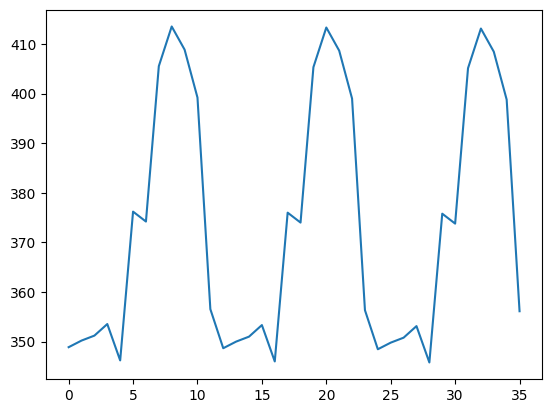

In [54]:
smooth = ExponentialSmoothing(dfemployees['number'], trend='add', initialization_method="estimated", seasonal='add', seasonal_periods=12).fit()
dfemployees['dub'] = smooth.fittedvalues
smooth.fittedvalues.plot()

<Axes: >

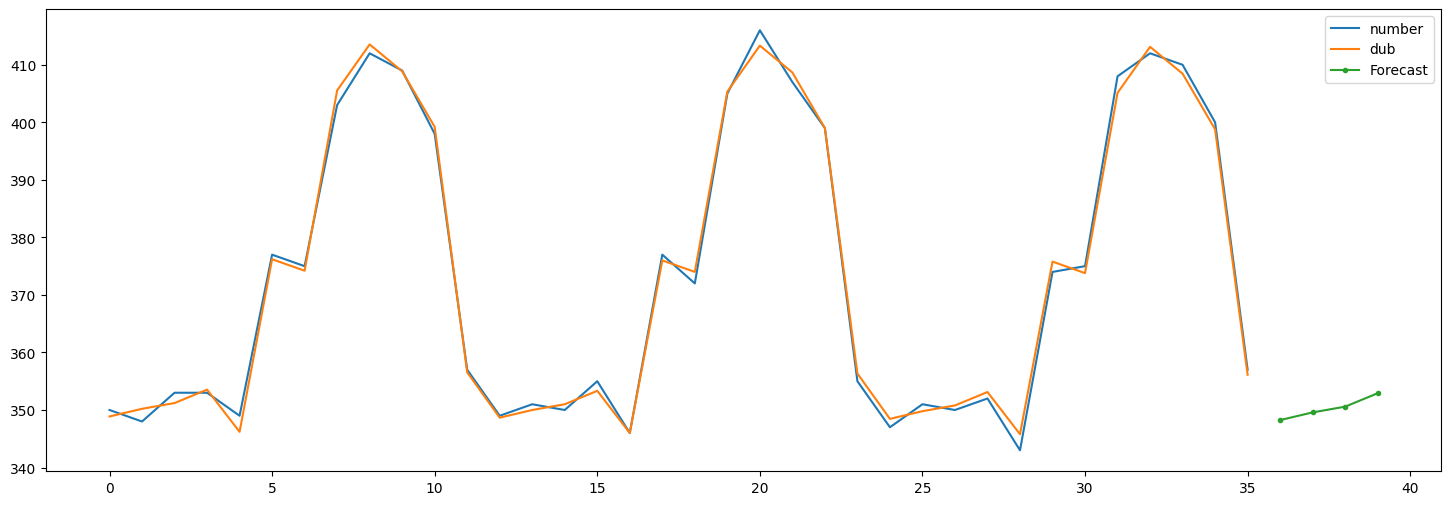

In [55]:
dfemployees.plot(y=['number', 'dub'], figsize=[18,6])
data_ses_fcast = smooth.forecast(4)
data_ses_fcast.plot(marker='.', legend=True, label='Forecast')


In [56]:
avg_2020 = dfemployees[dfemployees['recording_date'].dt.year == 2020]['number'].mean()
print(f"Average number of employees in 2020: {avg_2020:.2f}")

Average number of employees in 2020: 373.50


In [57]:
dfemployees[dfemployees['number'] > 400].count().iloc[0]

9

## Question 6

The sample given below contains measurement results of a variable Temperature at two time points (`time1` and `time2`). We want to know whether the measurements at the second time point are significantly different from those at the first time point.

Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What statistical test should you use to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis.
4. Calculate the p-value.
5. Draw a conclusion based on the previous step and formulate an answer to the research question.
6. Give for the observations at time `time1`:
    1. The interquartile range
    2. The kurtosis
    3. The range
    4. The standard deviation

In [58]:
temperatures = pd.DataFrame(data={
  'time1': [65, 87, 59, 71, 58, 74, 55, 98, 62, 53, 84, 63, 78, 62, 60],
  'time2': [82, 91, 86, 83, 85, 51, 65, 61, 76, 65, 53, 70, 51, 55, 68]
})

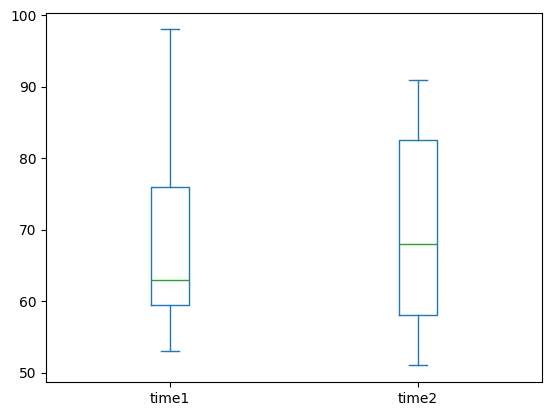

In [59]:
temperatures.plot(kind='box');

In [60]:
_, pvalue = stats.ttest_rel(temperatures.time1, temperatures.time2, alternative='less')
print(f"pvalue = {pvalue}")

pvalue = 0.43719974299972214


In [61]:
alpha = 0.05
print(f"We {'' if pvalue < alpha else 'do not '}reject H0")

We do not reject H0


In [62]:
iqr = (lambda x: x[0.75] - x[0.25])(temperatures['time1'].quantile([.25, .75]))
kurtosis = stats.kurtosis(temperatures['time1'])
range = temperatures['time1'].max() - temperatures['time1'].min()
stand = temperatures['time1'].std()

print(f"IQR: {iqr:.2f}, Kurtosis: {kurtosis:.2f}, Range: {range:.2f}, Standard deviation: {stand:.2f}")

IQR: 16.50, Kurtosis: -0.26, Range: 45.00, Standard deviation: 13.10


## Answers Question 6


1.
2.
3.
4.
5.
6.
   1.
   2.
   3.
   4.

## Question 7

The figure below shows a graph of a time series.  The observations are plotted in black with a solid line. In addition, three forms of moving average are plotted.

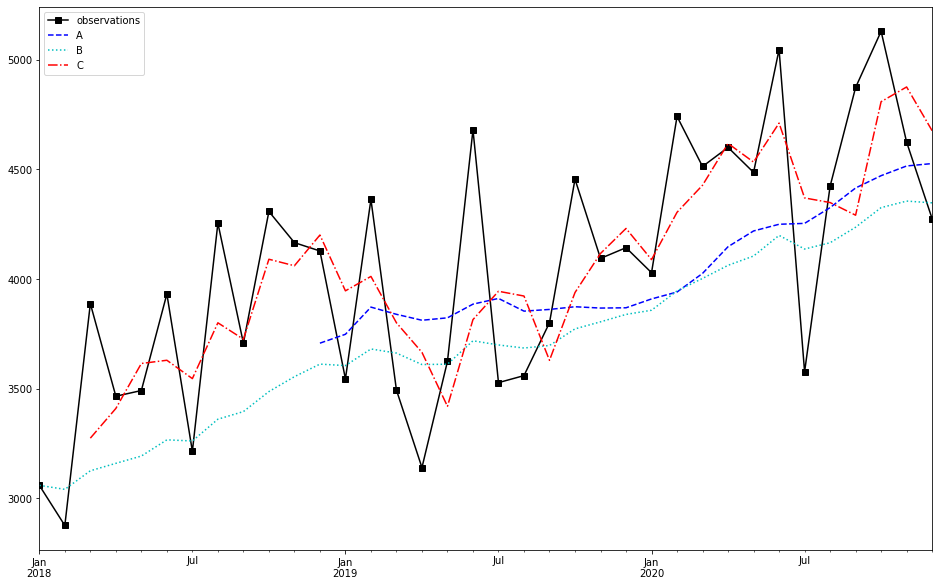

For each (A, B, C), indicate exactly what form of moving average is involved. Choose from the options given below:

- Simple moving average with period 3
- Simple moving average with period 12
- Simple exponential smoothing with $alpha = 0.1$
- Simple exponential smoothing with $alpha = 0.9$

If you had to set up a model for this time series based on exponential smoothing, which one would you use? Explain shortly your answer.

## Answers question 7

1. A (purple, Simple moving average with period 12):
2. B (cyan, Simple exponential smoothing with $alpha = 0.1$):
3. C (red, Simple moving average with period 3):
4. The most appropriate form of exponential smoothing is 1 because to much noise on 9


## Question 8

Given last year's mileage and maintenance costs of 23 trucks.

(1) Make the plot below (In the Answers, give the command for this plot)

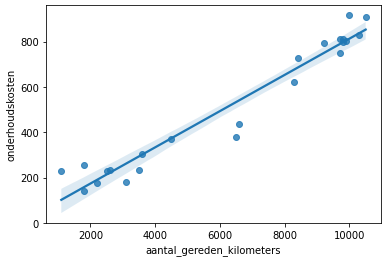

(2) Give the equation of the line   
(3) Calculate the correlation coefficient (symbol + value)  
(4) Formulate an interpretation for the value of the correlation coefficient  
(5) Approximately how much will be the maintenance cost of a truck driving 5000 kilometres.  
(6) What will be the approximate fixed cost of a truck even if it has not driven a single kilometre?  



In [63]:
sample_data = pd.DataFrame(data = {
    'mileage': [10500, 9700, 9200, 8300, 6500, 4500, 3500, 2200, 1800, 9800, 6600, 3600, 2500, 3100, 8400, 9700, 1800, 10000, 9800, 9900, 1100, 2600, 10300],
    'maintenance costs': [908.56, 751.12, 793.55, 619.61, 380.11, 368.72, 235.32, 174.93, 256.30, 799.58, 436.04, 304.25, 226.81, 179.68, 726.65, 810.53, 142.53, 915.53, 812.45, 803.78, 227.32, 231.46, 829.21]})

In [65]:
x = sample_data['mileage']
y = sample_data['maintenance costs']

# Means
x_mean = x.mean()
y_mean = y.mean()

# Numerator and denominator for slope
numerator = ((x - x_mean) * (y - y_mean)).sum()
denominator = ((x - x_mean) ** 2).sum()

# Slope and intercept
slope = numerator / denominator
intercept = y_mean - slope * x_mean

## Answers Question 8


1.
2.
3.
4.
5.


## Question 9

You recently offered samples of three products to every customer who entered your business. You then asked which product customers liked best. You recorded these preferences for Product A, Product B and Product C in the dataset given below.

Do customers have a distinct preference for any of these products? Use an appropriate statistical test (with significance level 5%) to verify this statement.

1. Visualise the data with an appropriate plot. What can you infer about the research question? Explain.
2. What hypothesis test will you apply to answer this research question? Be as specific as possible!
3. Formulate the null hypothesis and the alternative hypothesis
4. Calculate the appropriate test statistic (test statistic) for this test. Give the symbol and value
5. Calculate the p-value
6. Draw a conclusion based on the previous step and formulate an answer to the research question.

In [66]:
products = pd.DataFrame(data={'Choice': [
  "Product A","Product A","Product B","Product B","Product C",
  "Product B","Product B","Product B","Product C","Product B",
  "Product C","Product A","Product C","Product B","Product C",
  "Product B","Product C","Product C","Product C","Product B",
  "Product C","Product C","Product B","Product C","Product B",
  "Product B","Product B","Product B","Product A","Product B",
  "Product B","Product B","Product B","Product B","Product C",
  "Product C","Product B","Product C","Product C","Product A",
  "Product C","Product C","Product B","Product B","Product B",
  "Product B","Product C","Product C","Product C","Product C",
  "Product C","Product B","Product A","Product C","Product C",
  "Product B","Product B","Product C","Product C","Product C",
  "Product B","Product C","Product B","Product B","Product C",
  "Product B","Product B","Product C","Product C","Product B",
  "Product C","Product C","Product C","Product B","Product B",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product C",
  "Product C","Product C","Product C","Product C","Product B"
]})

## Answers Question 9


1.
2.
3.
4.
5.
6.